In [1]:
# !pip install numpy

In [2]:
import pandas as pd
import numpy as np
#data_bn=pd.read_excel('data_schema_v3.xlsx')

In [3]:
xls = pd.ExcelFile('data_schema_v3.xlsx')
customer = pd.read_excel(xls, 'Customers')
customer_assets = pd.read_excel(xls, 'Customer_Assets')
asset_obj=pd.read_excel(xls,'Asset_Objectives')
customer_ans=pd.read_excel(xls,'Customer_Answers')
questions=pd.read_excel(xls,'Questions')
answers=pd.read_excel(xls,'Answers')
risk_prof=pd.read_excel(xls,'Risk_Profile')
asset_classes=pd.read_excel(xls,'Asset_Classes')
fee=pd.read_excel(xls,'Fee_Structures')


In [4]:
customer.head(2)

,customer_ID,Contact_Last_Name,Contact_First_Name,Street,City,State,Zip,Country,Age,Marital_Status,Gender,Number_Of_Dependents
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0
1,2,Collins,Colt,"P.O. Box 643, 8508 At, St.",Boston,Massachusetts,25388,United States,65,Married,Male,0


In [5]:
merged_df=pd.merge(customer_ans,answers,on=['Question_ID','Answer_ID'],how='outer')

In [6]:
merged_df.head()

,customer_ID,Question_ID,Answer_ID,ANSWER_TEXT,Risk_Profile_ID
0,1,1,2,5-10 Years,2.0
1,14,1,2,5-10 Years,2.0
2,22,1,2,5-10 Years,2.0
3,27,1,2,5-10 Years,2.0
4,30,1,2,5-10 Years,2.0


In [7]:
merged_df.sort_values(by='customer_ID',inplace=True)

In [8]:
merged_df.dropna(inplace=True)

In [9]:
avg_score=merged_df.groupby('customer_ID')['Risk_Profile_ID'].mean()

In [10]:
score_dict=avg_score.to_dict()

In [11]:
score_dict

{1: 2.8333333333333335,
 2: 4.0,
 3: 3.0,
 4: 2.8333333333333335,
 5: 2.8333333333333335,
 6: 2.8333333333333335,
 7: 2.8333333333333335,
 8: 2.8333333333333335,
 9: 2.8333333333333335,
 10: 2.8333333333333335,
 11: 2.8333333333333335,
 12: 2.8333333333333335,
 13: 3.0,
 14: 2.7142857142857144,
 15: 3.1666666666666665,
 16: 3.2,
 17: 3.875,
 18: 2.857142857142857,
 19: 2.8333333333333335,
 20: 2.625,
 21: 2.857142857142857,
 22: 2.2857142857142856,
 23: 3.5,
 24: 2.857142857142857,
 25: 3.142857142857143,
 26: 3.7142857142857144,
 27: 2.4285714285714284,
 28: 3.0,
 29: 3.4285714285714284,
 30: 2.7142857142857144,
 31: 2.0,
 32: 3.0,
 33: 2.7142857142857144,
 34: 3.375,
 35: 2.5,
 36: 2.5,
 37: 2.8333333333333335,
 38: 2.8,
 39: 2.8333333333333335,
 40: 2.8333333333333335,
 41: 3.2,
 42: 2.8333333333333335,
 43: 2.8333333333333335,
 44: 2.5714285714285716,
 45: 2.625,
 46: 3.3333333333333335,
 47: 2.857142857142857,
 48: 3.6666666666666665,
 49: 3.142857142857143,
 50: 3.666666666666666

In [12]:
has_zero=any(value==0 for value in score_dict.values())

In [13]:
has_zero

False

In [14]:
risk_score_df=pd.DataFrame(score_dict.items(), columns=['customer_ID', 'Risk_Score'])

In [15]:
risk_score_df

,customer_ID,Risk_Score
0,1,2.833333
1,2,4.000000
2,3,3.000000
3,4,2.833333
4,5,2.833333
...,...,...
9995,9996,3.142857
9996,9997,2.857143
9997,9998,2.833333
9998,9999,2.833333


In [16]:
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']>=2]
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']<=4]
risk_score_counts = wealth_investor_constraint['Risk_Score'].value_counts()
risk_score_counts

2.833333    1051
3.000000     962
2.857143     443
3.142857     386
3.285714     359
3.500000     332
4.000000     307
2.500000     284
3.125000     283
2.714286     280
3.428571     275
3.571429     268
3.166667     257
2.571429     252
2.875000     238
3.250000     229
3.714286     205
3.857143     203
3.333333     197
2.666667     188
3.375000     179
2.750000     179
2.428571     171
2.625000     149
3.666667     149
3.625000     146
3.750000     123
2.333333     112
3.833333      99
2.285714      99
3.200000      90
2.375000      87
3.875000      68
2.142857      62
2.000000      61
2.800000      53
2.250000      46
3.600000      46
2.166667      46
2.600000      37
3.400000      34
3.800000      31
2.125000      27
2.400000      25
2.200000      22
1.833333      12
1.857143       7
1.800000       6
1.666667       3
1.875000       2
1.750000       2
1.714286       2
1.500000       2
1.400000       1
1.250000       1
Name: Risk_Score, dtype: int64

C:\Users\a720870\AppData\Local\Temp\ipykernel_5068\3530079461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['risk_score_range'] = pd.cut(data['Risk_Score'], bins=[2, 3, 4], labels=labels, right=False)


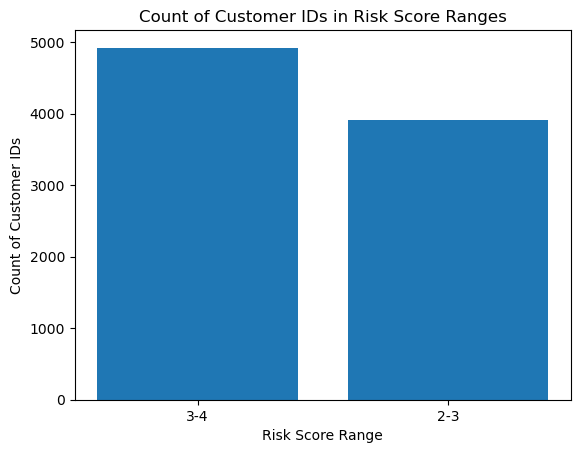

Summary Statistics of Risk Scores:
count    9178.000000
mean        3.068075
std         0.455969
min         1.250000
25%         2.833333
50%         3.000000
75%         3.375000
max         4.000000
Name: Risk_Score, dtype: float64
Proportion of Customers with Risk Score > 3: 0.4648071475266943


In [17]:
import pandas as pd

import matplotlib.pyplot as plt

data=wealth_investor_constraint

ranges = [(2, 3), (3, 4)]

labels = ['2-3', '3-4']

 
data['risk_score_range'] = pd.cut(data['Risk_Score'], bins=[2, 3, 4], labels=labels, right=False)

 


risk_score_counts = data['risk_score_range'].value_counts()

 


plt.bar(risk_score_counts.index, risk_score_counts.values)

plt.xlabel('Risk Score Range')

plt.ylabel('Count of Customer IDs')

plt.title('Count of Customer IDs in Risk Score Ranges')

plt.show()

 

# Calculate summary statistics of the risk scores

risk_score_summary = data['Risk_Score'].describe()

print("Summary Statistics of Risk Scores:")

print(risk_score_summary)

 

# Calculate the proportion of customers with a risk score greater than 3

proportion_above_3 = (data['Risk_Score'] > 3).mean()

print("Proportion of Customers with Risk Score > 3:", proportion_above_3)

In [45]:
# Analysis of Customer Asset Vs Objectives

In [46]:
# customer_assets.head()

Customer with Max Asset: 718
 Asset: customer_ID
1     3.715898e+06
2     7.230893e+06
3     5.871863e+06
4     1.274188e+07
5     8.836557e+06
6     8.818253e+06
7     1.259432e+07
8     8.972242e+06
9     6.891288e+06
10    1.041533e+07
Name: Total, dtype: float64


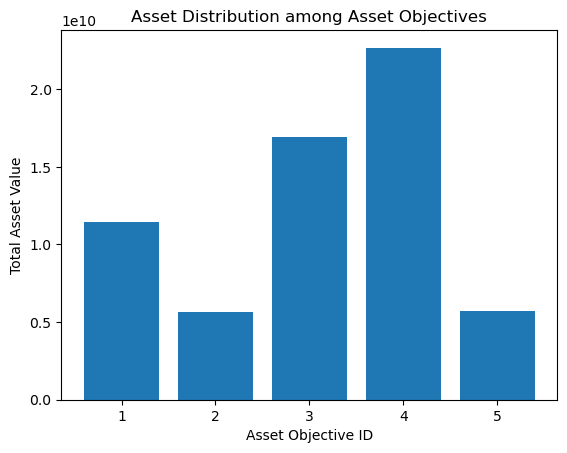

In [18]:
import matplotlib.pyplot as plt

 
# Customer with Max Asset

max_asset_customer = customer_assets.groupby('customer_ID')['Total'].sum().idxmax()

 

print("Customer with Max Asset:", max_asset_customer)

max_asset_customer2 = customer_assets.groupby('customer_ID')['Total'].sum()

 

print(" Asset:", max_asset_customer2[:10])

 

# Asset Distribution among Asset Objectives

asset_distribution = customer_assets.groupby('Asset_Objective_ID')['Total'].sum()

 

# bar chart to visualize the distribution

plt.bar(asset_distribution.index, asset_distribution.values)

plt.xlabel('Asset Objective ID')

plt.ylabel('Total Asset Value')

plt.title('Asset Distribution among Asset Objectives')

plt.show()

In [19]:
customer_merged_df=pd.merge(customer,risk_score_df,on=['customer_ID'],how='inner')

In [20]:
customer_merged_df.head()

,customer_ID,Contact_Last_Name,Contact_First_Name,Street,City,State,Zip,Country,Age,Marital_Status,Gender,Number_Of_Dependents,Risk_Score
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2.833333
1,2,Collins,Colt,"P.O. Box 643, 8508 At, St.",Boston,Massachusetts,25388,United States,65,Married,Male,0,4.000000
2,3,Crawford,Glenna,"P.O. Box 890, 8204 Lectus Rd.",Milwaukee,Wisconsin,33343,United States,65,NaN,Male,0,3.000000
3,4,Fisher,Sophia,Ap #274-5091 Vel Avenue,Salem,Oregon,90464,United States,65,Married,Female,0,2.833333
4,5,Gonzales,Evan,798-923 Ante Street,Olympia,Washington,82930,United States,65,Married,Female,0,2.833333


The correlation coefficient between Risk_Score and Number_Of_Dependents is 0.04


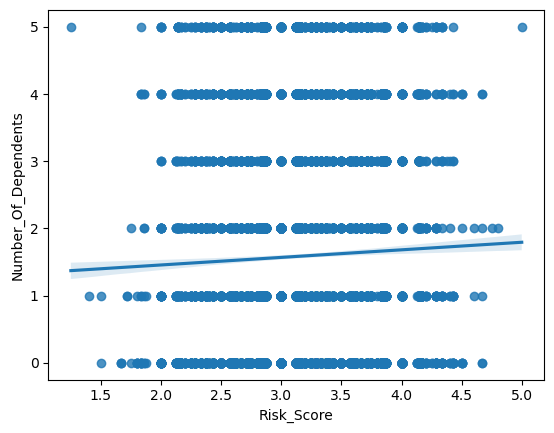

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

x='Number_Of_Dependents'
y='Risk_Score'

corr = customer_merged_df[y].corr(customer_merged_df[x])

print(f"The correlation coefficient between {y} and {x} is {corr:.2f}")

sns.regplot(x=y, y=x, data=customer_merged_df)
plt.show()


In [22]:
customer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_ID           10000 non-null  int64  
 1   Contact_Last_Name     10000 non-null  object 
 2   Contact_First_Name    10000 non-null  object 
 3   Street                10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Country               10000 non-null  object 
 8   Age                   10000 non-null  int64  
 9   Marital_Status        8111 non-null   object 
 10  Gender                9010 non-null   object 
 11  Number_Of_Dependents  10000 non-null  int64  
 12  Risk_Score            10000 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [23]:
customer_merged_df.describe()

,customer_ID,Zip,Age,Number_Of_Dependents,Risk_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,59267.266500,55.295100,1.586200,3.159566
std,2886.89568,27329.059867,12.140517,1.622662,0.533914
min,1.00000,10039.000000,33.000000,0.000000,1.250000
25%,2500.75000,35129.500000,45.000000,0.000000,2.833333
50%,5000.50000,60203.000000,57.000000,1.000000,3.125000
75%,7500.25000,85688.250000,65.000000,3.000000,3.500000
max,10000.00000,99996.000000,75.000000,5.000000,5.000000


In [24]:
customer_assets.head()

,customer_ID,Asset_Objective_ID,Total
0,1,1,1.157902e+05
1,2,1,1.991070e+06
2,3,1,1.569350e+06
3,4,1,2.162568e+06
4,5,1,1.366450e+06


In [25]:
# group by customer id and sum the asset column
customer_asset_sum = customer_assets.groupby("customer_ID")["Total"].sum().reset_index()
customer_asset_sum.columns = ["customer_ID", "total_asset"]
print(customer_asset_sum)


      customer_ID   total_asset
0               1  3.715898e+06
1               2  7.230893e+06
2               3  5.871863e+06
3               4  1.274188e+07
4               5  8.836557e+06
...           ...           ...
9995         9996  7.234247e+06
9996         9997  9.216708e+06
9997         9998  5.511694e+06
9998         9999  7.213900e+06
9999        10000  8.976896e+06

[10000 rows x 2 columns]


In [26]:
customer_asset_sum.head()

,customer_ID,total_asset
0,1,3.715898e+06
1,2,7.230893e+06
2,3,5.871863e+06
3,4,1.274188e+07
4,5,8.836557e+06


In [27]:
merged_customerdf=pd.merge(customer_merged_df,customer_asset_sum,on=['customer_ID'],how='outer')

In [28]:
merged_customerdf

,customer_ID,Contact_Last_Name,Contact_First_Name,Street,City,State,Zip,Country,Age,Marital_Status,Gender,Number_Of_Dependents,Risk_Score,total_asset
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2.833333,3.715898e+06
1,2,Collins,Colt,"P.O. Box 643, 8508 At, St.",Boston,Massachusetts,25388,United States,65,Married,Male,0,4.000000,7.230893e+06
2,3,Crawford,Glenna,"P.O. Box 890, 8204 Lectus Rd.",Milwaukee,Wisconsin,33343,United States,65,NaN,Male,0,3.000000,5.871863e+06
3,4,Fisher,Sophia,Ap #274-5091 Vel Avenue,Salem,Oregon,90464,United States,65,Married,Female,0,2.833333,1.274188e+07
4,5,Gonzales,Evan,798-923 Ante Street,Olympia,Washington,82930,United States,65,Married,Female,0,2.833333,8.836557e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Yates,Hedwig,779-9733 Mollis Street,Cleveland,Ohio,10039,United States,75,Married,Male,0,3.142857,7.234247e+06
9996,9997,Barron,Evelyn,691-6505 Tellus Ave,Wilmington,Delaware,79615,United States,75,Single,NaN,0,2.857143,9.216708e+06
9997,9998,Contreras,Chester,735-8568 Proin St.,Cambridge,Massachusetts,45051,United States,75,Married,NaN,0,2.833333,5.511694e+06
9998,9999,Walters,Channing,"P.O. Box 232, 226 Eget, St.",Eugene,Oregon,88735,United States,75,Single,NaN,0,2.833333,7.213900e+06


In [70]:
customer_asset_agg = customer_assets.groupby("customer_ID").agg({"Total": ["max", "min"]})
customer_asset_agg = customer_asset_agg.reset_index()
customer_asset_agg.columns = ["customer_ID", "max_asset", "min_asset"]

objectiveid_df = pd.merge(customer_asset_agg, customer_assets, on="customer_ID")

objectiveid_df["max_min"] = objectiveid_df["Total"].eq(objectiveid_df["max_asset"]).apply(lambda x: "max" if x else "").add(objectiveid_df["Total"].eq(objectiveid_df["min_asset"]).apply(lambda x: "min" if x else ""))
objectiveid_df = objectiveid_df.pivot_table(index=['customer_ID', 'max_asset', 'min_asset'], columns='max_min', values='Asset_Objective_ID', aggfunc='first').reset_index() 
objectiveid_df.columns = ['customer_ID', 'max_asset', 'min_asset','dummy', 'oid_max_asset', 'oid_min_asset']
objectiveid_df = objectiveid_df.drop(columns="dummy")




customer_complete_info = pd.merge(merged_customerdf, objectiveid_df, on="customer_ID")
print(customer_complete_info.head(10))

customer_complete_info["pct_change"] = ((customer_complete_info["max_asset"] - customer_complete_info["min_asset"]) / customer_complete_info["max_asset"]) * 100
print(customer_complete_info)


   customer_ID Contact_Last_Name Contact_First_Name  \
0            1            Chaney             Jemima   
1            2           Collins               Colt   
2            3          Crawford             Glenna   
3            4            Fisher             Sophia   
4            5          Gonzales               Evan   
5            6           Jimenez               John   
6            7             Johns               Cody   
7            8             Kline               Hoyt   
8            9        Mclaughlin              Astra   
9           10           Meadows              Wanda   

                          Street         City          State    Zip  \
0               5584 Orci Street    Lexington       Kentucky  36751   
1     P.O. Box 643, 8508 At, St.       Boston  Massachusetts  25388   
2  P.O. Box 890, 8204 Lectus Rd.    Milwaukee      Wisconsin  33343   
3        Ap #274-5091 Vel Avenue        Salem         Oregon  90464   
4            798-923 Ante Street      O

In [74]:
customer_complete_info.to_excel("customer_complete_info.xlsx")


In [73]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder
# import os
# os.environ["THREADPOOLCTL_SKIP_OPENMP"] = "True"
# import sklearn

# df=customer_complete_info
# features = ["Age","Gender","Risk_Score","Marital_Status"]

# le = LabelEncoder()
# df["Gender"] = le.fit_transform(df["Gender"])
# df["Marital_Status"] = le.fit_transform(df["Marital_Status"])

# X = df[features].values

# k = 3

# model = KMeans(n_clusters=k)
# model.fit(X)

# df["Cluster"] = model.labels_

# df = df.sort_values(by="total_asset", ascending=False)

# print(df)


C:\Users\a720870\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'